# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | brae
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | dodge city
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | victoria
Processin

Processing Record 35 of Set 4 | khokhryaki
Processing Record 36 of Set 4 | kodinsk
Processing Record 37 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 4 | drumnadrochit
Processing Record 39 of Set 4 | changji
Processing Record 40 of Set 4 | swift current
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | jimma
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | inuvik
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | nantucket
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | bluff
Processing Record 2 of Set 5 | ballina
Processing Record 3 of Set 5 | maniitsoq
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | wa
City not found. Skipping...
Processing Record 6 o

Processing Record 20 of Set 8 | tilichiki
Processing Record 21 of Set 8 | halalo
City not found. Skipping...
Processing Record 22 of Set 8 | santa cecilia
Processing Record 23 of Set 8 | saint-benoit
Processing Record 24 of Set 8 | pasighat
Processing Record 25 of Set 8 | noyabrsk
Processing Record 26 of Set 8 | santiago
Processing Record 27 of Set 8 | nabire
Processing Record 28 of Set 8 | kuryk
Processing Record 29 of Set 8 | vicosa
Processing Record 30 of Set 8 | sur
Processing Record 31 of Set 8 | yumen
Processing Record 32 of Set 8 | mangrol
Processing Record 33 of Set 8 | fukue
Processing Record 34 of Set 8 | port hardy
Processing Record 35 of Set 8 | kirovsk
Processing Record 36 of Set 8 | mar del plata
Processing Record 37 of Set 8 | nevers
Processing Record 38 of Set 8 | arica
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | umea
Processing Record 41 of Set 8 | timra
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | severobaykalsk

Processing Record 2 of Set 12 | ordzhonikidze
Processing Record 3 of Set 12 | acuitzio
Processing Record 4 of Set 12 | dombas
Processing Record 5 of Set 12 | boyolangu
Processing Record 6 of Set 12 | banda aceh
Processing Record 7 of Set 12 | bellevue
Processing Record 8 of Set 12 | gorodishche
Processing Record 9 of Set 12 | westport
Processing Record 10 of Set 12 | lolua
City not found. Skipping...
Processing Record 11 of Set 12 | conceicao do araguaia
Processing Record 12 of Set 12 | tecoanapa
Processing Record 13 of Set 12 | el balyana
City not found. Skipping...
Processing Record 14 of Set 12 | esfarayen
Processing Record 15 of Set 12 | karwar
Processing Record 16 of Set 12 | trincomalee
Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | tigil
Processing Record 19 of Set 12 | grand island
Processing Record 20 of Set 12 | vao
Processing Record 21 of Set 12 | waingapu
Processing Record 22 of Set 12 | graham
Processing Record 23 of Set 12 | correia pinto


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_pd=pd.DataFrame(city_data)
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.to_csv("Desktop", index_label="City_ID")
city_data_pd.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [10]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint anthony,90,US,1555875088,76,43.97,-111.68,51.8,5.82
1,hermanus,0,ZA,1555875126,81,-34.42,19.24,64.0,5.99
2,cayenne,75,GF,1555873200,62,4.94,-52.33,86.0,11.41
3,katsuura,75,JP,1555873688,93,33.93,134.50,62.6,5.82
4,busselton,10,AU,1555875126,66,-33.64,115.35,43.0,8.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

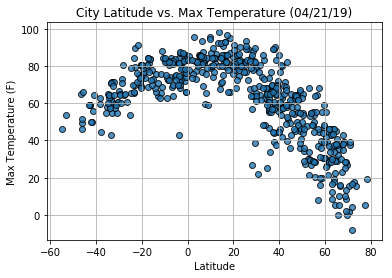

In [11]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

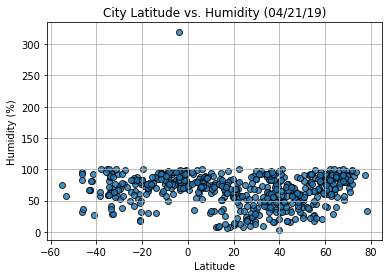

In [12]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

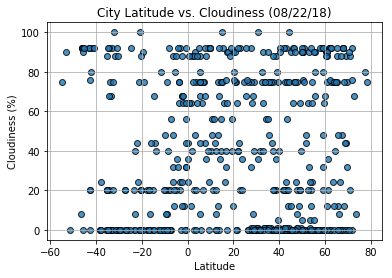

In [8]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

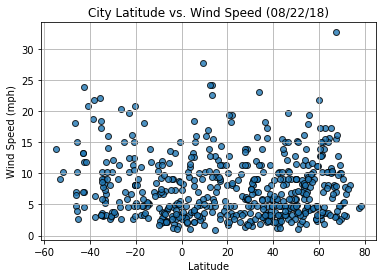